# Machine Learning with Python/Scikit-Learn - Application to the Estimation Occupancy.
Ismam Bin Hasnat

SGB- M2 

1. Read the CSV file Final_data with Panda
    1. How to Collect Labels Office H358
    2. How many Levels of Occupany do you have in your label Data? 
    3. Plot label with each Feature, What is you Conclusion?

In [175]:
# importing necessary libraries

from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import numpy as np

# Collecting data from the CSV file 

data = pd.read_csv('finalData.csv', sep='	',index_col='time')
df = pd.DataFrame(data)
#print(df)

scaler = StandardScaler()
time = data.index
hours = pd.DatetimeIndex(time).hour
data["hours"] = hours
power_consumption=data["power_consumption"]

label=data["label"]
motion = data['motion']
acoustic_pressure = data['acoustic_pressure_dB']
door_opening = data['door_opening']


<Figure size 720x1440 with 0 Axes>

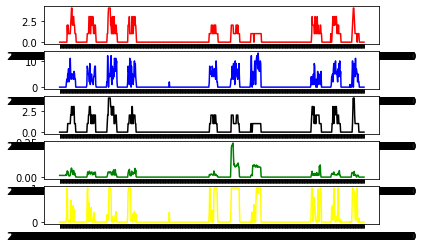

<Figure size 720x1440 with 0 Axes>

In [176]:
# Potting each features and labels 



fig, ax = plt.subplots(5,1)

ax[0].plot(label,color= 'red')
ax[1].plot(data["motion"],color='blue')
ax[2].plot(data["power_consumption"],color='black')
ax[3].plot(data["acoustic_pressure_dB"],color='green')
ax[4].plot(data["door_opening"],color='yellow')

plt.figure(figsize = (10, 20))

3. Divide the data into training and testing sets using Panda 

                     label
time                      
2015-05-11 02:00:00    0.0
2015-05-06 23:30:00    0.0
2015-05-09 02:00:00    0.0
2015-05-08 22:30:00    0.0
2015-05-13 20:00:00    1.0
...                    ...
2015-05-20 21:00:00    0.0
2015-05-08 02:30:00    0.0
2015-05-09 09:30:00    0.0
2015-05-07 11:00:00    1.0
2015-05-09 01:30:00    0.0

[194 rows x 1 columns] [0. 0. 0. 0. 1. 1. 0. 0. 2. 1. 0. 0. 0. 0. 4. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 2. 0. 0. 0. 1. 1. 0. 0. 2. 1. 0. 0. 0. 0. 3. 2. 0. 0. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 2. 2. 0. 0. 0. 1. 0. 0. 0. 0. 0. 2. 3. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 2. 0. 2. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 2. 1. 0. 0. 0. 0. 0. 0. 2. 0. 1. 0. 0. 2. 2. 0. 2. 3. 2. 0.
 0. 2. 0. 0. 0. 0. 0. 1. 4. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.
 0. 3. 0. 0. 1. 0. 0. 1. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4. 0. 0. 0.
 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 2. 1. 0. 0. 0. 0. 0.
 2. 0.]


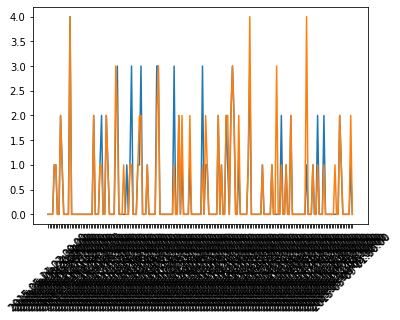

In [177]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
# Dividing the traing and testing datasets for Supervised learning

x_train, x_test, y_train, y_test = train_test_split(data[["motion","acoustic_pressure_dB","power_consumption","door_opening"]],data[['label']], test_size=.27, random_state=0)
#x_train, x_test = train_test_split(data[["motion","acoustic_pressure_dB","power_consumption","door_opening"]], test_size= .27, random_state=0) # Test size for X_train and X_

classifier = tree.DecisionTreeClassifier() 
#ccp_alpha is "cost complexity pruning", to check whether the decision tree is overfitting or underfitting


def decision_tree(x_train, y_train, x_test, y_test):
    
    classifier.fit(x_train, y_train)
    y_predict=classifier.predict(x_test)
    plt.plot(y_test)
    plt.plot(y_predict)
    plt.show
    plt.xticks(rotation=45)
    
    return(y_test, y_predict)

y_test, y_predict = decision_tree(x_train, y_train, x_test, y_test)

print(y_test, y_predict)

4. Implement Decision Tree (DT)

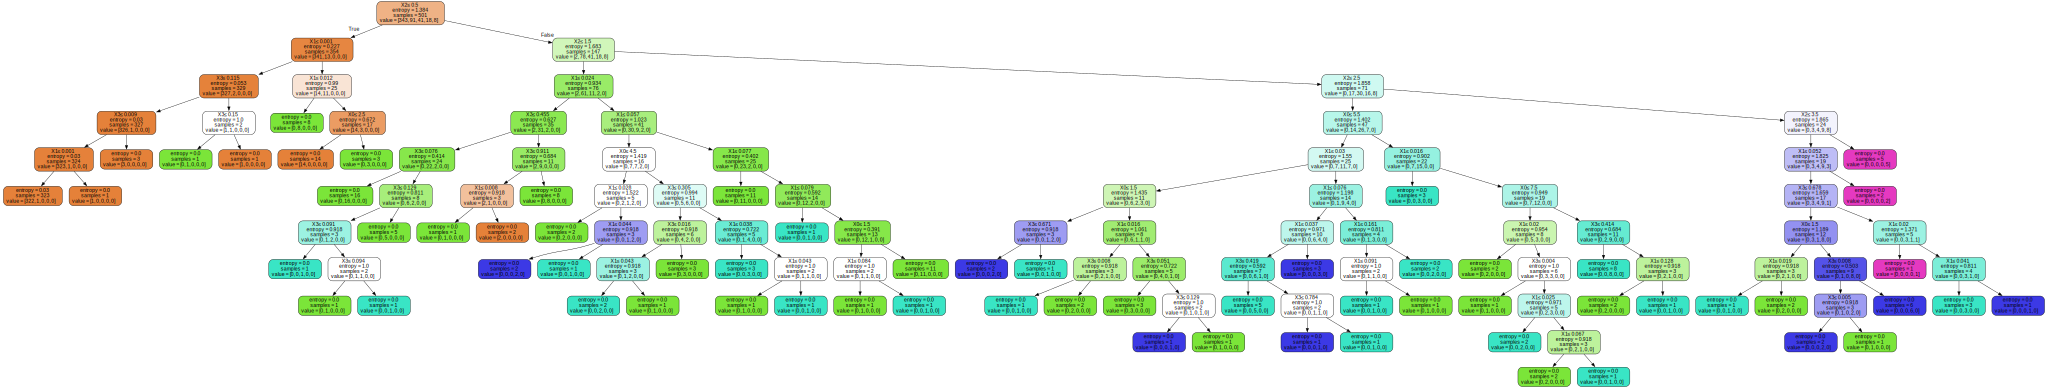

In [195]:
from sklearn import tree

x_train, x_test, y_train, y_test = train_test_split(data[["motion","acoustic_pressure_dB","power_consumption","door_opening"]],data[['label']], test_size=.3, random_state=0)

names = ["motion","power_consumotion","acoustinc_pressure_DB","door_opening"]

classifier = tree.DecisionTreeClassifier(random_state=0,criterion='entropy')
classifier.fit(x_train,y_train)

import graphviz
tree_plot = tree.export_graphviz(classifier, out_file=None,   
        filled=True, rounded=True,  
        special_characters=True)  
graph = graphviz.Source(tree_plot) 
graph

Unsupervised Learning - Random Forest classifier

In [201]:
x_train, x_test = train_test_split(data[["motion","acoustic_pressure_dB","power_consumption","door_opening"]], test_size= .27, random_state=0) # Test size for X_train and X_

#For Unsupervised learning
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=0).fit(x_train)

kmeans.predict(x_test)
kmeans.cluster_centers_
print("Kmeans Predict is")
print(kmeans.predict(x_test))

print(kmeans.cluster_centers_)
print(kmeans.labels_)

Kmeans Predict is
[0 0 0 0 2 2 0 0 4 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0
 4 2 0 0 0 0 4 1 0 0 0 4 0 1 0 1 1 0 0 0 1 4 4 0 0 0 1 0 0 0 0 0 1 4 0 0 0
 0 0 0 0 0 0 4 0 0 4 0 1 0 0 0 0 4 0 0 0 0 0 0 0 1 0 3 1 0 0 0 0 0 0 1 0 4
 0 0 1 4 0 4 1 4 0 0 3 0 0 0 0 0 3 2 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 4 0 0
 2 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 2 0 0 1 0 0 0 4 0 0 0 0 0 0 1 0 0
 4 4 0 0 0 0 4 3 0]
[[5.52486188e-03 1.68538122e-03 1.10497238e-02 2.24643646e-04]
 [4.92982456e+00 3.92229123e-02 1.80701754e+00 4.58758579e-01]
 [7.94871795e+00 4.95685385e-02 1.51282051e+00 5.43919846e-01]
 [1.07000000e+01 3.96240500e-02 1.35000000e+00 5.13711500e-01]
 [1.95555556e+00 2.96099778e-02 1.35555556e+00 2.83033822e-01]]
[0 1 0 0 0 0 0 1 0 0 0 0 0 2 0 0 2 4 0 0 0 0 2 4 0 0 2 0 0 0 0 1 0 4 0 0 0
 0 0 0 3 2 2 0 0 0 0 2 0 0 1 0 0 0 0 0 2 0 1 1 0 0 0 0 4 0 2 0 0 0 0 4 3 0
 4 2 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 2 1 0 4 0 0 0 0 0 0 0 0 4 0 0 0 0 0 1
 1 0 0 0 3 0 0 0 0 0 0 1 2 0 0 0 0 0 0 3 2 0 0

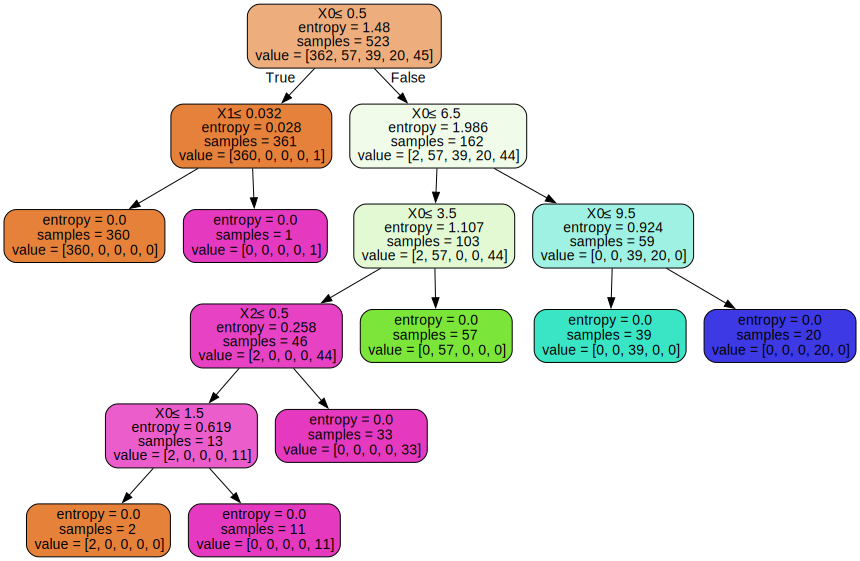

In [202]:
names = ["motion","power_consumption","acoustinc_pressure_DB","door_opening"]

classifier = tree.DecisionTreeClassifier(random_state=0,criterion='entropy')
classifier.fit(x_train,kmeans.labels_)

#for i in range(max_depth)
# fig = plt.figure(figsize=(50,50))
# tree.plot_tree(classifier, feature_names=names, filled=True)
# plt.show()
import graphviz
dot_data = tree.export_graphviz(classifier, out_file=None,   
        filled=True, rounded=True,  
        special_characters=True)  
graph = graphviz.Source(dot_data) 
graph

4. Define the most important feature and compare with 1.C

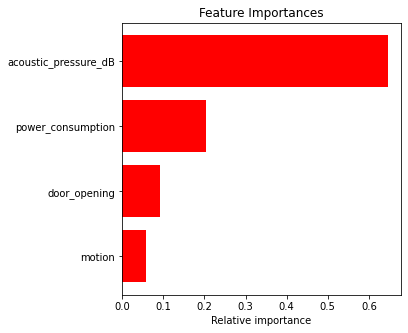

In [179]:
features= df.columns 
importances= classifier.feature_importances_
indices = np.argsort(importances)  

plt.figure(figsize= (5,5))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks( range(len(indices)) ,[features[i] for i in indices]) # setting text label in y_axis
plt.xlabel('Relative importance')
plt.show()

Here, the most important feature appears to be acoustic_pressure_dB. Whereas, analysing the question 1.C and the relevant plots, power_consumptions seemed to be the most important feature.

5. Calculate the accuracy, error and f-Score. What is you observation ?

In [192]:
from sklearn import metrics
from sklearn.metrics import f1_score
f1_score(y_test, y_predict, average=None)

array([0.98601399, 0.64      , 0.57142857, 0.30769231, 0.5       ])

In [193]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)


0.8762886597938144

In [194]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_predict)


0.15979381443298968

In [189]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99       144
         1.0       0.64      0.64      0.64        25
         2.0       0.50      0.67      0.57        15
         3.0       0.50      0.22      0.31         9
         4.0       0.33      1.00      0.50         1

    accuracy                           0.88       194
   macro avg       0.59      0.70      0.60       194
weighted avg       0.88      0.88      0.88       194



6. Calculate the f-score considering 90% and 10% training testing data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data[["motion","acoustic_pressure_dB","power_consumption","door_opening"]],data[['label']], test_size=.10,  random_state=0)
#x_train, x_test = train_test_split(data[["motion","acoustic_pressure_dB","power_consumption","door_opening"]], test_size= .27, random_state=0) # Test size for X_train and X_

classifier = tree.DecisionTreeClassifier() 
#ccp_alpha is "cost complexity pruning", to check whether the decision tree is overfitting or underfitting


def decision_tree(x_train, y_train, x_test, y_test):
    
    classifier.fit(x_train, y_train)
    y_predict=classifier.predict(x_test)

    
    return(y_test, y_predict)

y_test, y_predict = decision_tree(x_train, y_train, x_test, y_test)

f1_score(y_test, y_predict, average=None)

7. Change the Tree Depth to [2,3,4, .. . max] then plot accuracy with the depth. 
    1. How dow you determine the most interesting depth? 

In [ ]:
def decision_tree(data, split_size, limit_depth):
        x_train, x_test, y_train, y_test = train_test_split(data[['power_consumption','motion','acoustic_pressure_dB','door_opening']],data[['label']], test_size=split_size, random_state=0)
        classifier = tree.DecisionTreeClassifier(random_state=0, max_depth=limit_depth)
        classifier.fit(x_train, y_train)
        y_pred = classifier.predict(x_test)
        #print('accurancy = ',accuracy_score(y_pred, y_test))
        return(accuracy_score(y_pred, y_test))

tree_depth_acc = []
for i in np.arange(1,20,1):
    tree_depth_acc.append(decision_tree(data, 0.27, i))
    
print(tree_depth_acc)
plt.plot(tree_depth_acc),(np.arange(1,20,1),)
plt.ylabel('tree_depth_acc')
plt.xlabel('tree_depth')
plt.show()
print(max(tree_depth_acc))

From the figure, the most interesting depth is 5, since there around that depth, the accuracy is maximum.

Evaluating the maximum accuracy 

In [ ]:
def decision_tree(data, size):
        x_train, x_test, y_train, y_test = train_test_split(data[['power_consumption','motion','acoustic_pressure_dB','door_opening']],data[['label']], test_size=size, random_state=0)
        classifier = tree.DecisionTreeClassifier(random_state=0)
        classifier.fit(x_train, y_train)
        y_pred = classifier.predict(x_test)
        #print('accurancy = ',accuracy_score(y_pred, y_test))
        return(accuracy_score(y_pred, y_test))

accuracy = []
for i in np.arange(0.1, 0.9, 0.01):
    accuracy.append(decision_tree(data, i))
    
plt.plot(np.arange(0.1, 0.9, 0.01), accuracy)
plt.ylabel('accuracy')
plt.show()
print('The split percentage with highest accuracy = ', 0.1+0.01*accuracy.index(max(accuracy))) # (0.1+0.01) because, it is converting the index  

8. Plot the Tree and  extract the if-then rule

In [ ]:
import graphviz
tree_plot = tree.export_graphviz(classifier, out_file=None,   
        filled=True, rounded=True,  
        special_characters=True)  
graph = graphviz.Source(tree_plot) 
graph

In [ ]:
# For unsupervised Learning 

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=0).fit(x_train)

kmeans.predict(x_test)
kmeans.cluster_centers_
print("Kmeans Predict is")
print(kmeans.predict(x_test))

print(kmeans.cluster_centers_)
print(kmeans.labels_)

In [ ]:
x_train, x_test = train_test_split(data[["motion","acoustic_pressure_dB","power_consumption","door_opening"]], test_size= .27, random_state=0) # Test size for X_train and X_

names = ["motion","power_consumption","acoustinc_pressure_DB","door_opening"]

classifier = tree.DecisionTreeClassifier(random_state=0,criterion='entropy')
classifier.fit(x_train,kmeans.labels_)

import graphviz
dot_data = tree.export_graphviz(classifier, out_file=None,   
        filled=True, rounded=True,  
        special_characters=True)  
graph = graphviz.Source(dot_data) 
graph

9. Make the model flexible, accuracy vs cost 

In [181]:
scenarios=[["acoustic_pressure_dB","power_consumption","motion","door_opening"],
          ["acoustic_pressure_dB","power_consumption","motion"],
          ["acoustic_pressure_dB","power_consumption","door_opening"],
          ["acoustic_pressure_dB","motion","door_opening"],
          ["acoustic_pressure_dB","motion"],
          ["acoustic_pressure_dB","door_opening"],
           ["acoustic_pressure_dB","power_consumption"],
          ["power_consumption","motion","door_opening"],
           ["power_consumption","door_opening"],
           ["motion","door_opening"], ["power_consumption","motion"],
           ["motion"],["door_opening"], ["power_consumption"],
           ["acoustic_pressure_dB"]
           ]
price= {"power_consumption":4*88.75, "acoustic_pressure_dB": 150,
       "door_opening": 40, "motion":119}


Index(['acoustic_pressure_dB', 'power_consumption', 'motion', 'door_opening'], dtype='object')
Index(['acoustic_pressure_dB', 'power_consumption', 'motion'], dtype='object')
Index(['acoustic_pressure_dB', 'power_consumption', 'door_opening'], dtype='object')
Index(['acoustic_pressure_dB', 'motion', 'door_opening'], dtype='object')
Index(['acoustic_pressure_dB', 'motion'], dtype='object')
Index(['acoustic_pressure_dB', 'door_opening'], dtype='object')
Index(['acoustic_pressure_dB', 'power_consumption'], dtype='object')
Index(['power_consumption', 'motion', 'door_opening'], dtype='object')
Index(['power_consumption', 'door_opening'], dtype='object')
Index(['motion', 'door_opening'], dtype='object')
Index(['power_consumption', 'motion'], dtype='object')
Index(['motion'], dtype='object')
Index(['door_opening'], dtype='object')
Index(['power_consumption'], dtype='object')
Index(['acoustic_pressure_dB'], dtype='object')


[664.0,
 624.0,
 545.0,
 309,
 269,
 190,
 505.0,
 514.0,
 395.0,
 159,
 474.0,
 119,
 40,
 355.0,
 150]

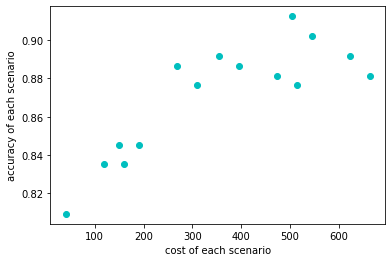

In [182]:
total_cost = []
accuracy = []
error = []
combinations = []

for x in scenarios:
    x_train, x_test, y_train, y_test = train_test_split(data[x],data[['label']], test_size= 0.27, random_state=0)
    classifier = tree.DecisionTreeClassifier(max_depth=4)
    classifier.fit(x_train,y_train)
    y_predict_test = classifier.predict(x_test)
    accuracy.append(accuracy_score(y_test, y_predict_test))
    error.append(mean_absolute_error(y_test, y_predict_test))
    cost = 0
    print(data[x].columns)
    combinations.append(data[x].columns)
    for i in x:
        cost = cost + price[i]
    total_cost.append(cost)


plt.plot(total_cost, accuracy, 'o', color = 'c')
plt.xlabel("cost of each scenario")
plt.ylabel("accuracy of each scenario")

total_cost

Cost Vs Accuracy can help the companies make the cost effective decision


10. Plot predicted occupancy vs actual occupancy 

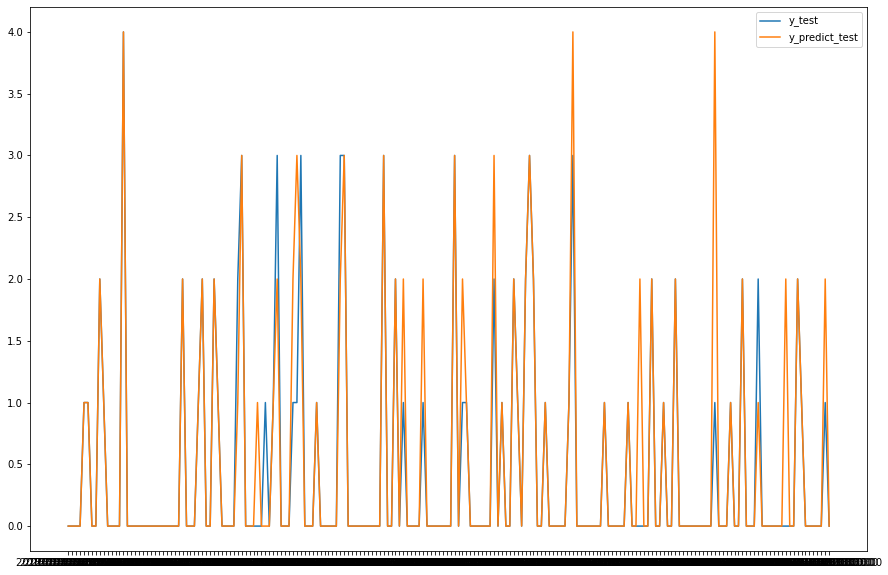

In [183]:
x_train, x_test, y_train, y_test = train_test_split(data[['power_consumption','motion','acoustic_pressure_dB','door_opening']],data[['label']], test_size=0.27, random_state=0, shuffle=True)
classifier = tree.DecisionTreeClassifier(max_depth=5)
classifier.fit(x_train,y_train)
y_predict_test = classifier.predict(x_test)

fig,ax = plt.subplots(figsize = (15,10))

ax.plot(y_test)
ax.plot(y_predict_test)
ax.legend(['y_test','y_predict_test'])
plt.show()
plt.ion()

#print(y_test, y_predict

11. Compare Decision Tree with other classification methods such as RandomForestClassifier

In [203]:
x_train, x_test = train_test_split(data[["motion","acoustic_pressure_dB","power_consumption","door_opening"]], test_size= .27, random_state=0) # Test size for X_train and X_



from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(criterion = "gini",   #Use n_estimators = 20 (or other values to fine tune the model)
                            n_estimators=20,
                            min_samples_split = 20,
                            random_state=5)

clf.fit(x_train,kmeans.labels_)

RandomForestClassifier(min_samples_split=20, n_estimators=20, random_state=5)

In [204]:
clf.feature_importances_

array([0.67196672, 0.04128377, 0.15647458, 0.13027493])

In [205]:
df.columns
clf.score(x_train,kmeans.labels_)

0.9961759082217974

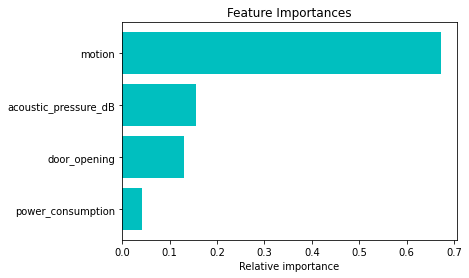

In [206]:
features= df.columns 
importances= clf.feature_importances_
indices = np.argsort(importances) # ?? 

plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color='c', align='center')
plt.yticks( range(len(indices)) ,[features[i] for i in indices]) # setting text label in y_axis
plt.xlabel('Relative importance')
plt.show()

- Comparing to decision tree Model, here the most important feature appeas to be Power Consumption.
- The clf score is 0.99,  Which is similar to f1 score of the supervised model.
